In [18]:
#Basic libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#deeep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [19]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [20]:
fashion_train.shape

(60000, 785)

In [21]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

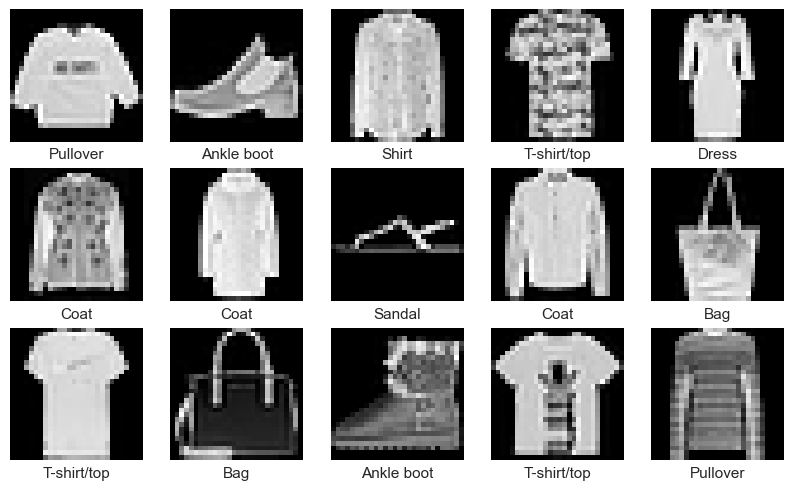

In [22]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#names of clothings accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


#visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [23]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)


y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [24]:


#creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])
    


#Comipling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])


#fitting the model
history=model.fit(X_train_fashion, y_train_fashion,batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))


Epoch 1/30
600/600 [==============================] - 8s 9ms/step - loss: 1.0996 - accuracy: 0.6218 - val_loss: 0.5243 - val_accuracy: 0.8243
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.7406 - accuracy: 0.7462 - val_loss: 0.4861 - val_accuracy: 0.8318
Epoch 3/30
600/600 [==============================] - 3s 6ms/step - loss: 0.6729 - accuracy: 0.7694 - val_loss: 0.4557 - val_accuracy: 0.8491
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.6401 - accuracy: 0.7805 - val_loss: 0.4529 - val_accuracy: 0.8532
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.6212 - accuracy: 0.7926 - val_loss: 0.4386 - val_accuracy: 0.8559
Epoch 6/30
600/600 [==============================] - 4s 6ms/step - loss: 0.6005 - accuracy: 0.8001 - val_loss: 0.4428 - val_accuracy: 0.8553
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.5908 - accuracy: 0.8029 - val_loss: 0.4351 - val_accuracy: 0.8629
Epoch 

In [25]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 2s 5ms/step - loss: 0.5429 - accuracy: 0.8645


In [26]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8645


In [27]:
#predicting the labels-fashion
y_predict_fash=model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)


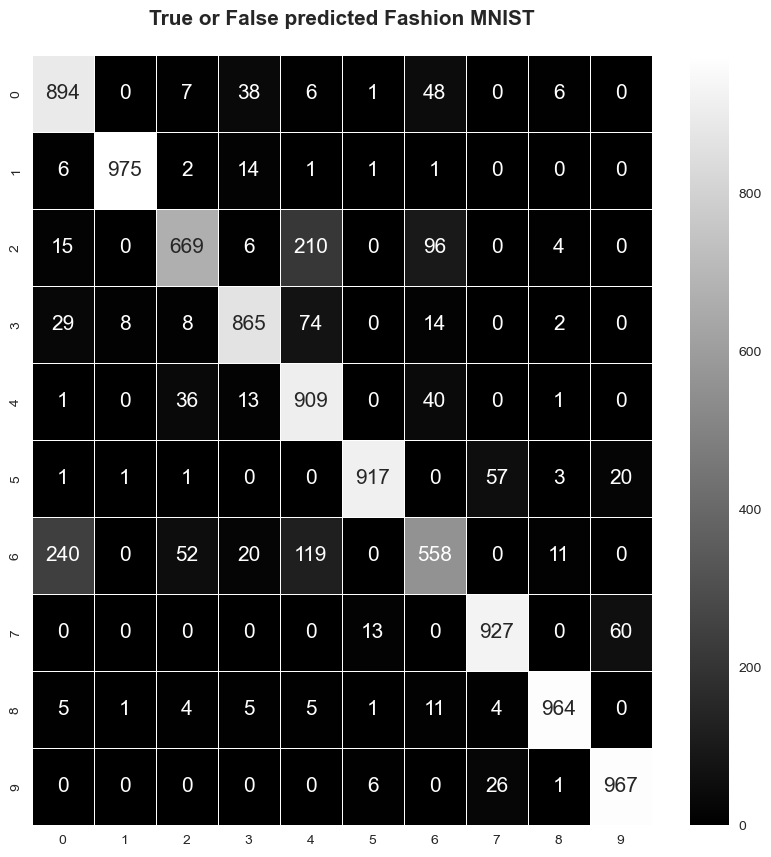

In [28]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [29]:
from sklearn.metrics import classification_report


print(classification_report(y_test_fash_eval,y_predict_fash))


              precision    recall  f1-score   support

           0       0.75      0.89      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.67      0.75      1000
           3       0.90      0.86      0.88      1000
           4       0.69      0.91      0.78      1000
           5       0.98      0.92      0.95      1000
           6       0.73      0.56      0.63      1000
           7       0.91      0.93      0.92      1000
           8       0.97      0.96      0.97      1000
           9       0.92      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [30]:

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


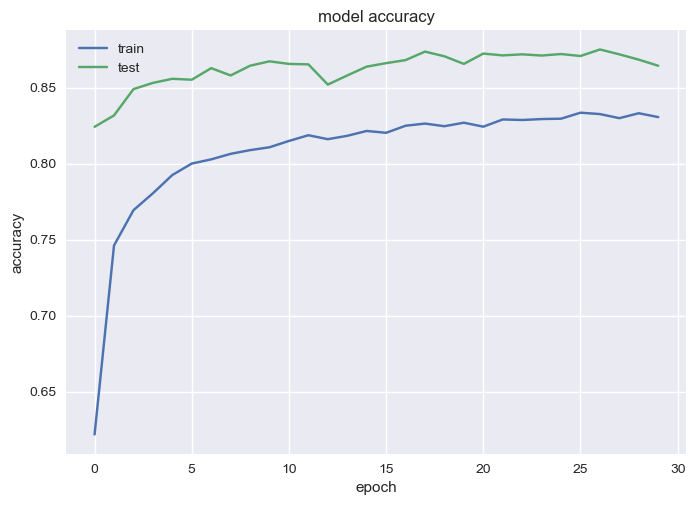

In [31]:


#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()
           

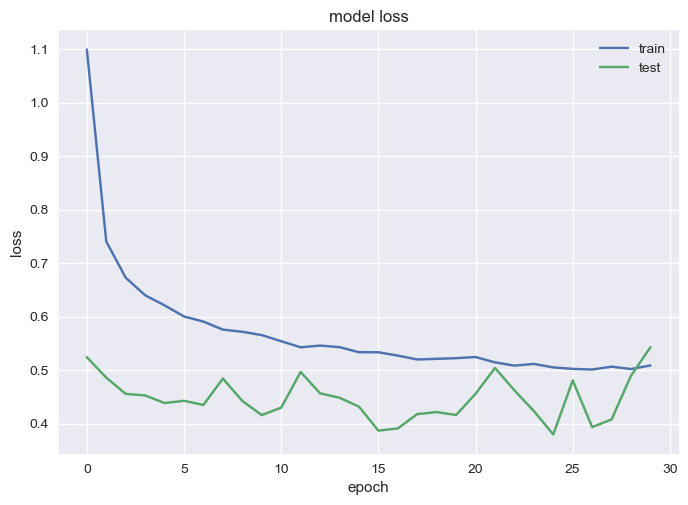

In [32]:
#summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()
           

In [33]:
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) #here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

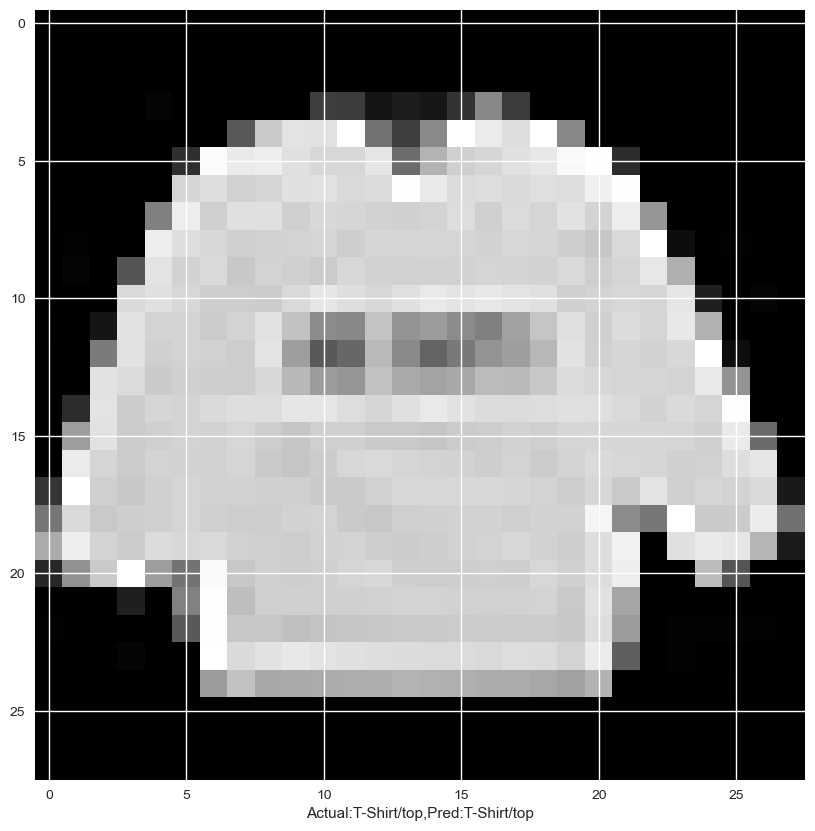

In [34]:
#names of clothing accessories in order
col_names = ['T-Shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0],cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()